In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
%matplotlib inline

# Optimising our Machine Learning Algorithms


To improve our Naïve Bayes Model and Logistic Regression Model, we have decided to go through the process of Feature Selection.

We believe that because we have a large amount of predictors at 19, and because some nominal categories have no inherent relationship with the response variable class, they might not have predictive value and can introduce noise and reduce the accuracy of the model.

It may be reasonable to remove these categories from the machine learning model

In Feature selection, we will identify and retain the most important features, while discarding the least important ones


## Ranking Feature Importance 

We will be getting the feature importance scores from the decision tree model since it currently performs the best.

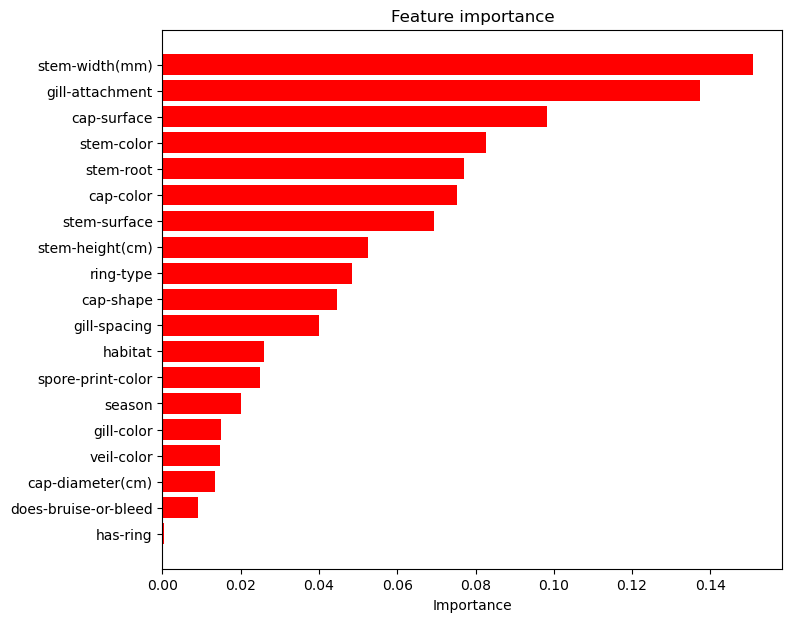

has-ring 0.0003174
does-bruise-or-bleed 0.0090603
cap-diameter(cm) 0.0133791
veil-color 0.0147053
gill-color 0.0148885
season 0.0201012
spore-print-color 0.0248318
habitat 0.0259587
gill-spacing 0.0399885
cap-shape 0.0446037
ring-type 0.0483127
stem-height(cm) 0.0525963
stem-surface 0.0695166
cap-color 0.0753564
stem-root 0.0770286
stem-color 0.0827186
cap-surface 0.0982848
gill-attachment 0.1374487
stem-width(mm) 0.1509029
Average feature importance value:  0.0526316


In [48]:
features_list = mushroom_predictors.columns.values
feature_importance = dectree.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


for idx in sorted_idx:
    print(features_list[idx], round(feature_importance[idx], 7))

feature_importance_avg = sum(feature_importance)/len(feature_importance)
print("Average feature importance value: ", round(feature_importance_avg,7))

From the ***Feature importance selector***, we see that the top 6 features with high Importance Values are :
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color

Comparing it with the relatively higher correlated variables picked up from ***Cramer's V***:

1. stem-color(0.07)
2. stem-surface(0.07)
3. cap-color(0.06)
4. cap-surface(0.05)
5. gill-attachment(0.05)
6. stem-root(0.05) 

And the relatively higher correlated variables picked up from the ***Correlation Matrix***:
1. cap-surface (0.11)
2. does-bruise-or-bleed(-0.18)
3. gill-spacing (-0.81)
4. gill-color (0.098)
5. spore-print-color (0.13)
6. habitat(0.11)

Comparing these 3 correlation insights, we see that Cramer's V and the Feature Importance selector actually have many similar features that they picked up to be important. They picked up these 5 : 
1. stem-color
2. cap-color
3. cap-surface
4. gill-attachment
5. stem-root 

Whereas for those selected by the ***Correlation Matrix***, there was only cap-surface that it managed to pick out. 

This could perhaps show that ***Cramer's V*** and ***Feature Importance selector*** from decision tree are more reliable.

We will now only use those predictors selected by the two of them and use them in our models again, where we select features with Importance Values equal or greater than the average from the ***Feature importance selector***, and also the 6 from the ***Cramer's V***.

In total we are left with these 13 predictors .
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color
7. stem-surface
8. stem-height(cm)
9. gill-spacing
10. ring-type
11. cap-shape
12. spore-print-color
13. habitat 

we will then discard the other 6 variables 
1. veil-color 
2. has-ring 
3. season 
4. does-bruise-or-bleed 
5. gill-color 
6. cap-diameter(cm) 



In [49]:
# Creating new data frame with only these 13 variables

refined_mushroom_predictors = mushroom_predictors.copy()
refined_mushroom_predictors.drop(['veil-color','has-ring','season','does-bruise-or-bleed','gill-color','cap-diameter(cm)'], axis=1,inplace=True)
refined_mushroom_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cap-shape          61069 non-null  int32  
 1   cap-surface        61069 non-null  int32  
 2   cap-color          61069 non-null  int32  
 3   gill-attachment    61069 non-null  int32  
 4   gill-spacing       61069 non-null  int32  
 5   stem-height(cm)    61069 non-null  float64
 6   stem-width(mm)     61069 non-null  float64
 7   stem-root          61069 non-null  int32  
 8   stem-surface       61069 non-null  int32  
 9   stem-color         61069 non-null  int32  
 10  ring-type          61069 non-null  int32  
 11  spore-print-color  61069 non-null  int32  
 12  habitat            61069 non-null  int32  
dtypes: float64(2), int32(11)
memory usage: 3.5 MB


## Naïve Bayes Classifier (Attempt 2)

In [50]:
# Extract the variables and the associated data as a dataframe
predictor = refined_mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Here we use Gaussian Naïve Bayes, which implements the Gaussian Naïve Bayes algorithm for classification.
# We import the GaussianNB package from the sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# We fit the model with the defined Train data
nb.fit(predictor_train, edible_train.values.ravel())


Train Set : (48855,) (48855, 13)
Test Set  : (12214,) (12214, 13)


GaussianNB()

### The Train Set


Accuracy:  0.6307235697472111
Naive Bayes Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.73      0.53      0.61     27055
           1       0.56      0.76      0.65     21800

    accuracy                           0.63     48855
   macro avg       0.65      0.64      0.63     48855
weighted avg       0.66      0.63      0.63     48855



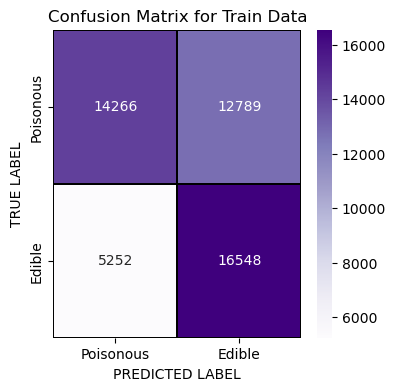

True Positive Rate :  0.7590825688073395
False Positive Rate :  0.47270375161707634
AUC: 0.6845791


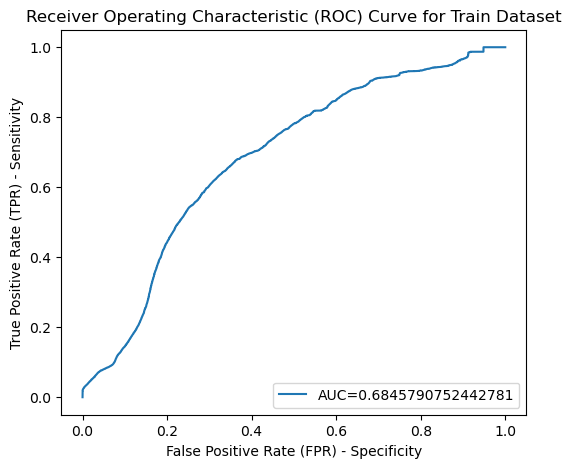

In [51]:
 # First make predictions on the train set
edible_train_pred = nb.predict(predictor_train)

# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1train = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1
y_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Calculating the AUC of the Train dataset
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_train)
edible_train_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_train, edible_train_prob, pos_label=1)

# here we assign the predicted probabilities of the train set into y_true
y_true = (edible_train == 1).astype(int)
auc = roc_auc_score(y_true, edible_train_prob)
print("AUC: {:.7f}".format(auc))

fig = plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Dataset')
plt.show()





### The Test Set


Accuracy:  0.6304241034878009
Naive Bayes Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.73      0.53      0.61     27055
           1       0.56      0.76      0.65     21800

    accuracy                           0.63     48855
   macro avg       0.65      0.64      0.63     48855
weighted avg       0.66      0.63      0.63     48855



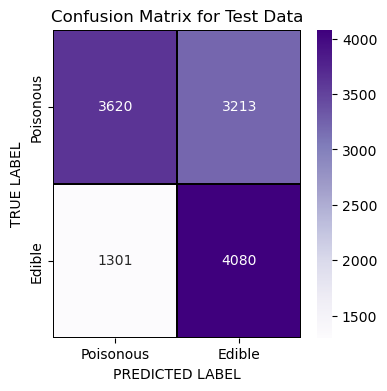

True Positive Rate :  0.7582233785541721
False Positive Rate :  0.4702180594175326
AUC: 0.6873393


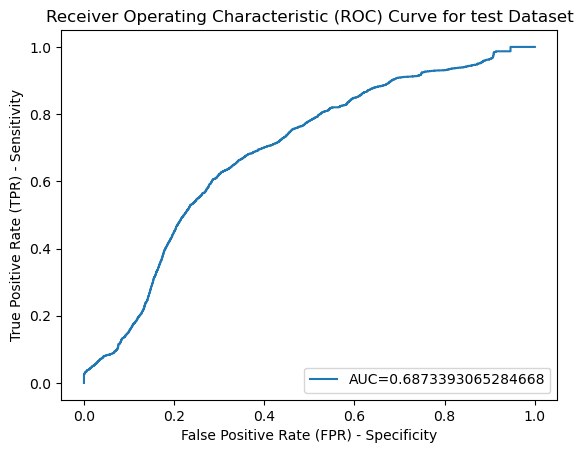

In [52]:
# After making predictions on the train set, we make predictions on the test set
edible_test_pred = nb.predict(predictor_test)

# Evaluate the model again by checking the accuracy of the predicted test data against the actual test data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1test = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Predict the probabilities of edible class for the test data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_test)
edible_test_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_test, edible_test_prob, pos_label=1)

# Calculating the AUC of the Test dataset
y_true = (edible_test == 1).astype(int)
auc = roc_auc_score(y_true, edible_test_prob)
print("AUC: {:.7f}".format(auc))

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()




## Logistic Regression (Attempt 2)


In [53]:
predictor = refined_mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)

# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train.values.ravel())

# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)



Train Set : (48855,) (48855, 13)
Test Set  : (12214,) (12214, 13)
Intercept 	:  [-2.83540006]
Coefficients 	: [[ 0.01922933 -0.02506699 -0.08170196  0.01816954 -0.05929484  0.03900228
   0.03342851  0.05502223  0.13573394  0.03484077 -0.09645283  0.28763581
   0.00975021]]


### The Train Set

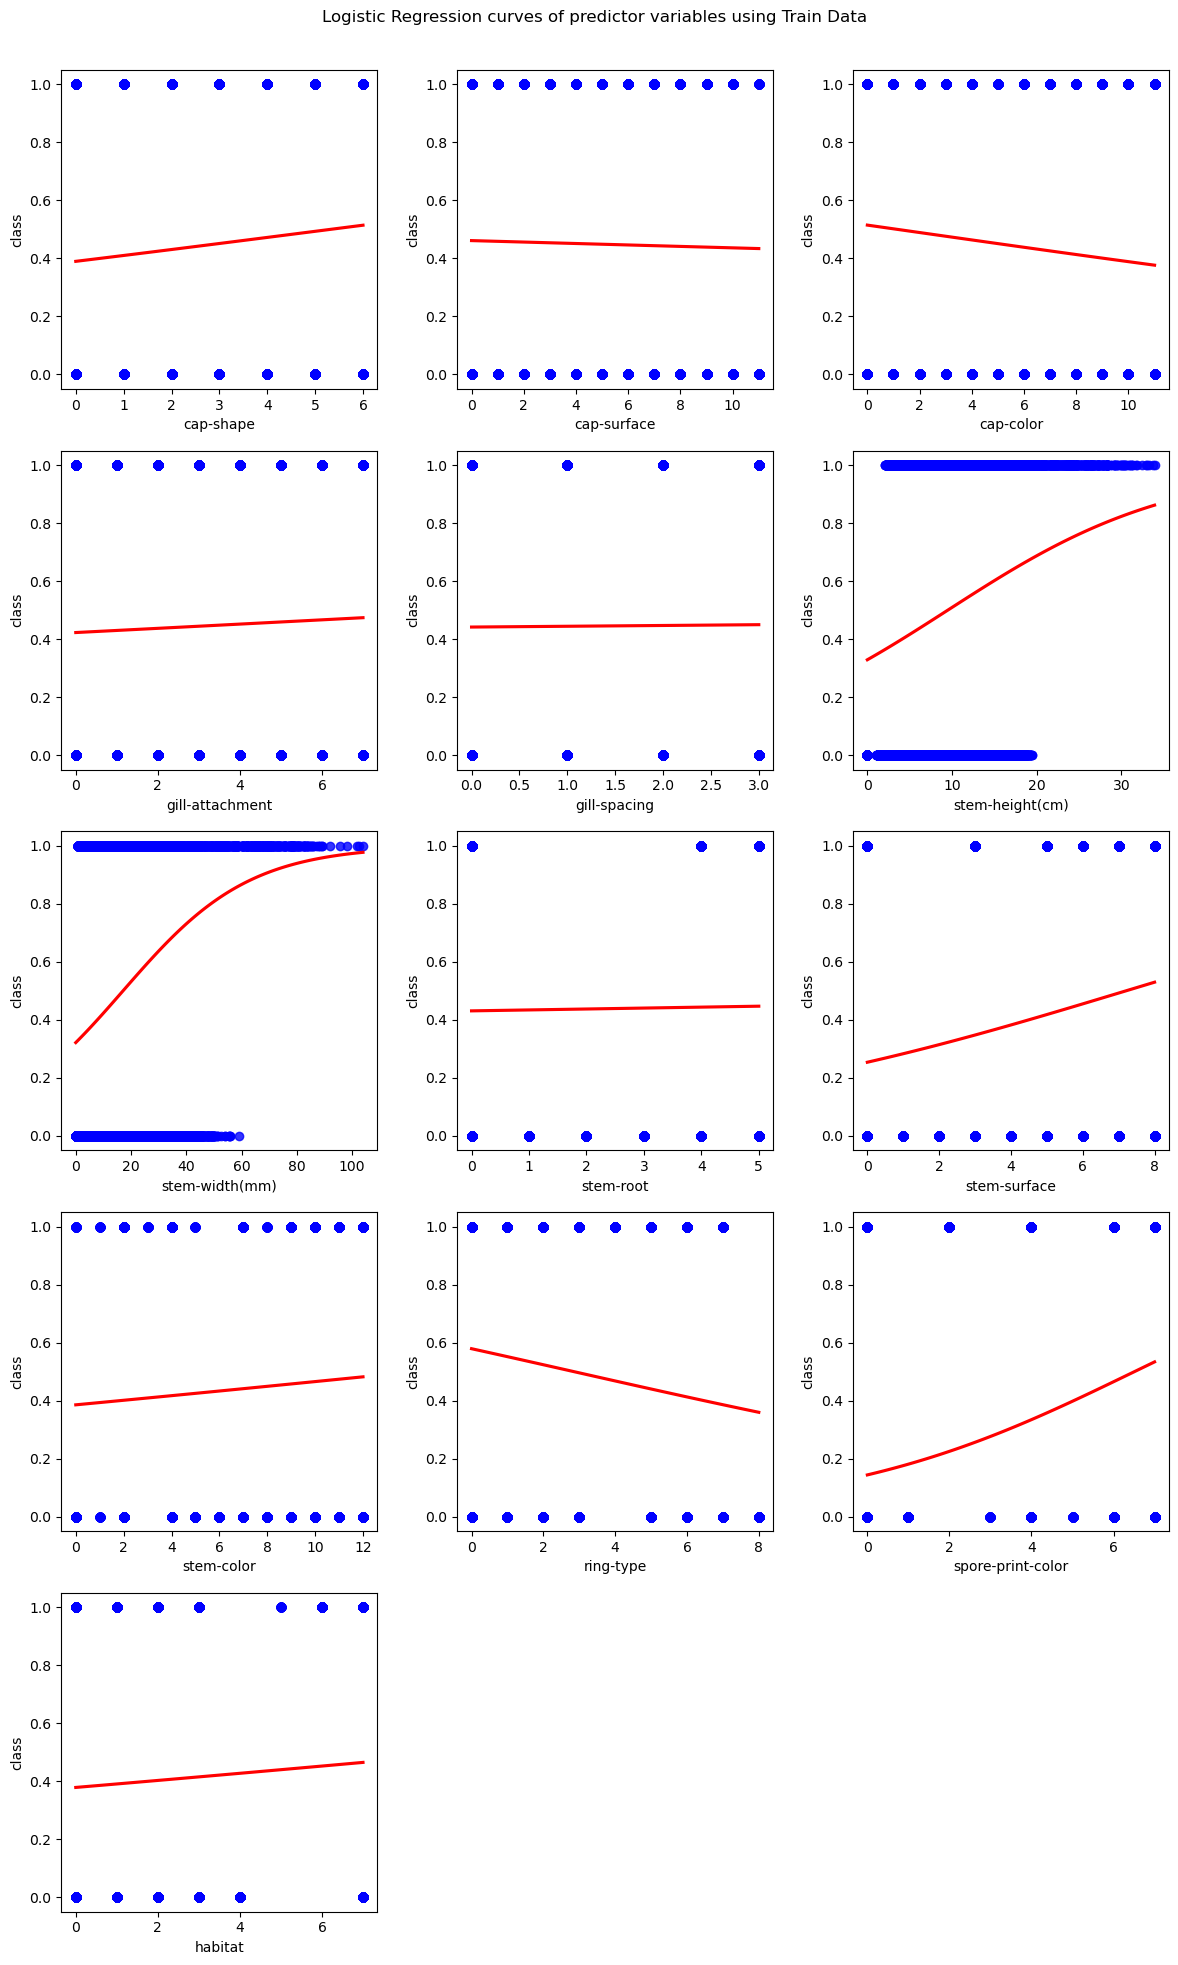

In [54]:
# Predict class of train set using train set of predictor variables using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)


# Plot the logistic regression curve of the train data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve

# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data=predictor_train, x=col, y=edible_train, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])

    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Train Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()



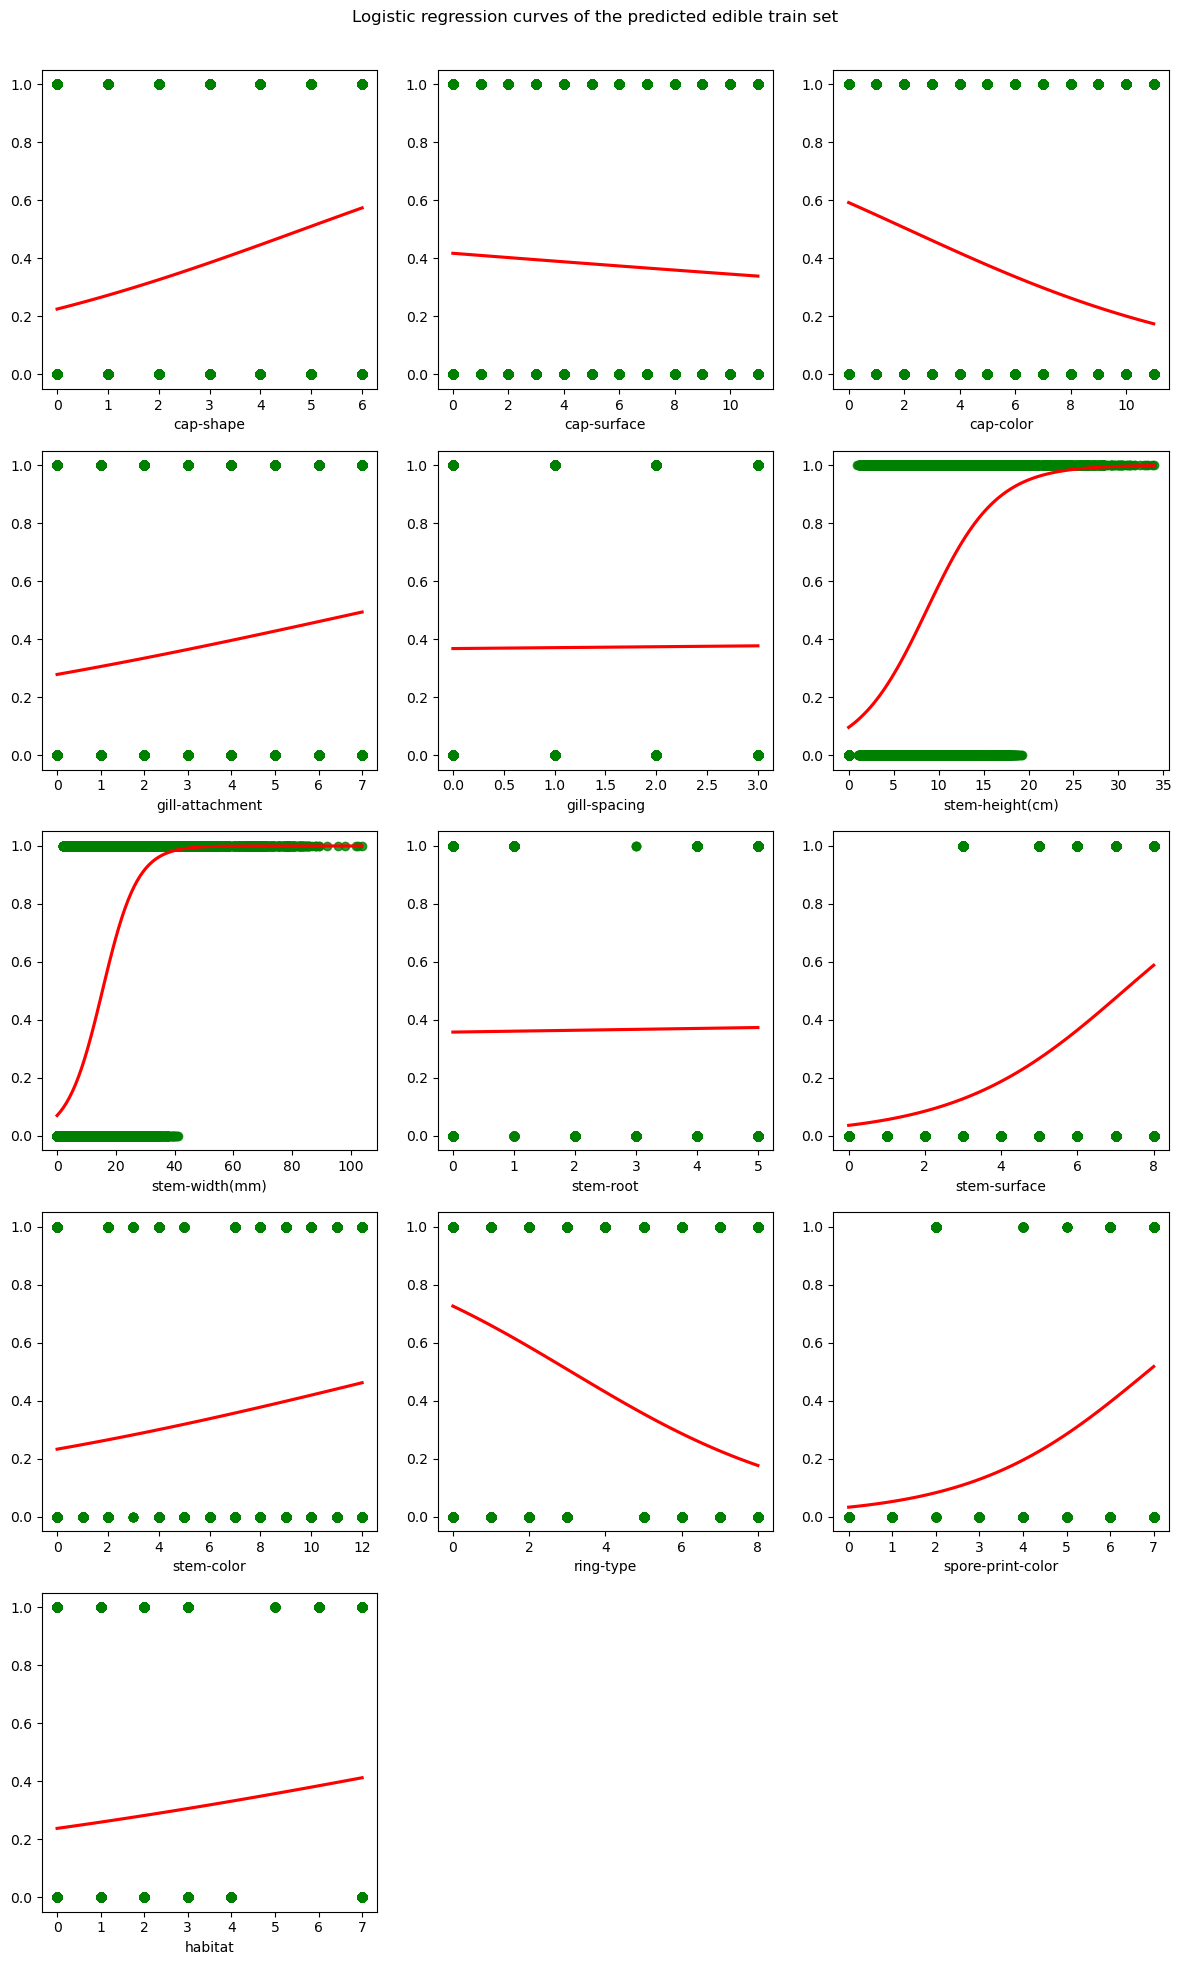

In [55]:
# Plot the logistic regression curve of the predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data = predictor_train, x = col, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible train set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()

Accuracy : 0.6411830928257087
              precision    recall  f1-score   support

           0       0.66      0.74      0.70     27084
           1       0.62      0.51      0.56     21771

    accuracy                           0.64     48855
   macro avg       0.64      0.63      0.63     48855
weighted avg       0.64      0.64      0.64     48855



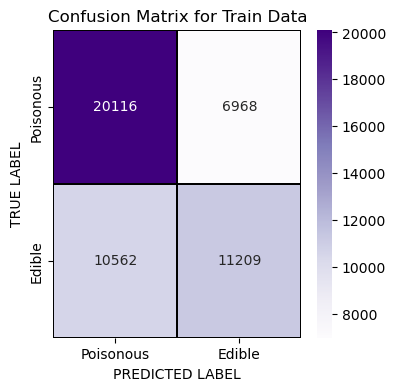

True Positive Rate :  0.5148592163887741
False Positive Rate :  0.2572736671097327


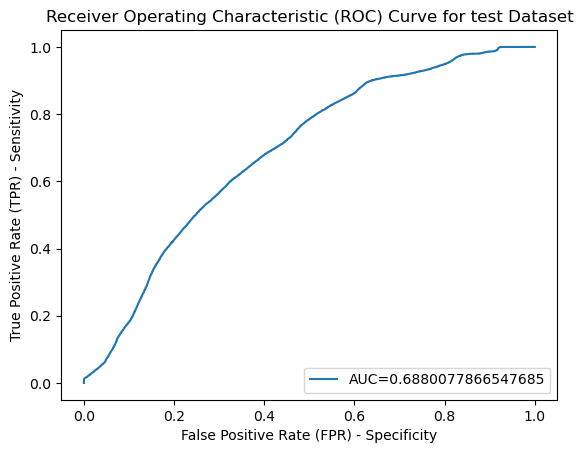

In [56]:
# Print the confusion matrix of the train data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

cm2train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

### The Test Set

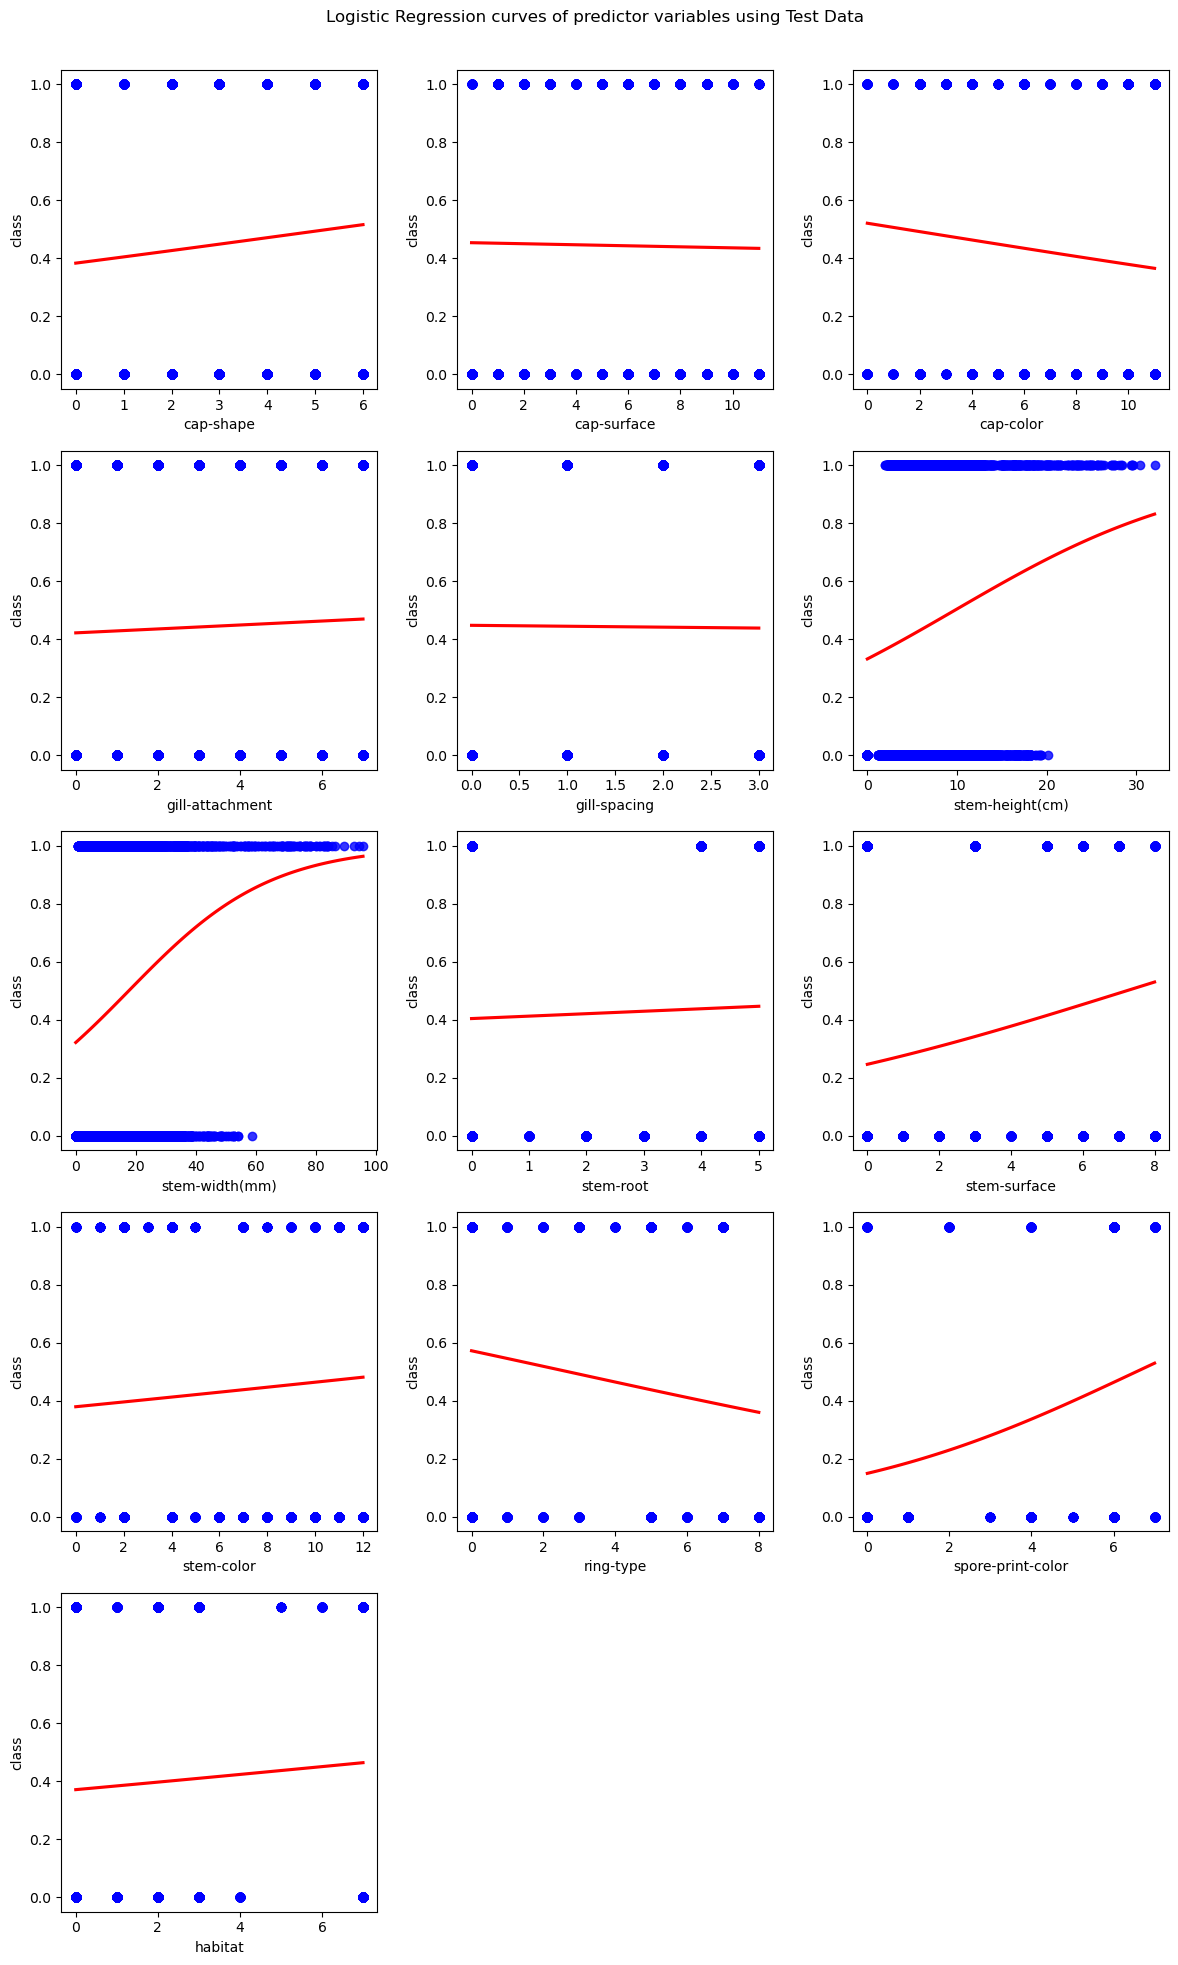

In [57]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data=predictor_test, x=col, y=edible_test, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Test Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()


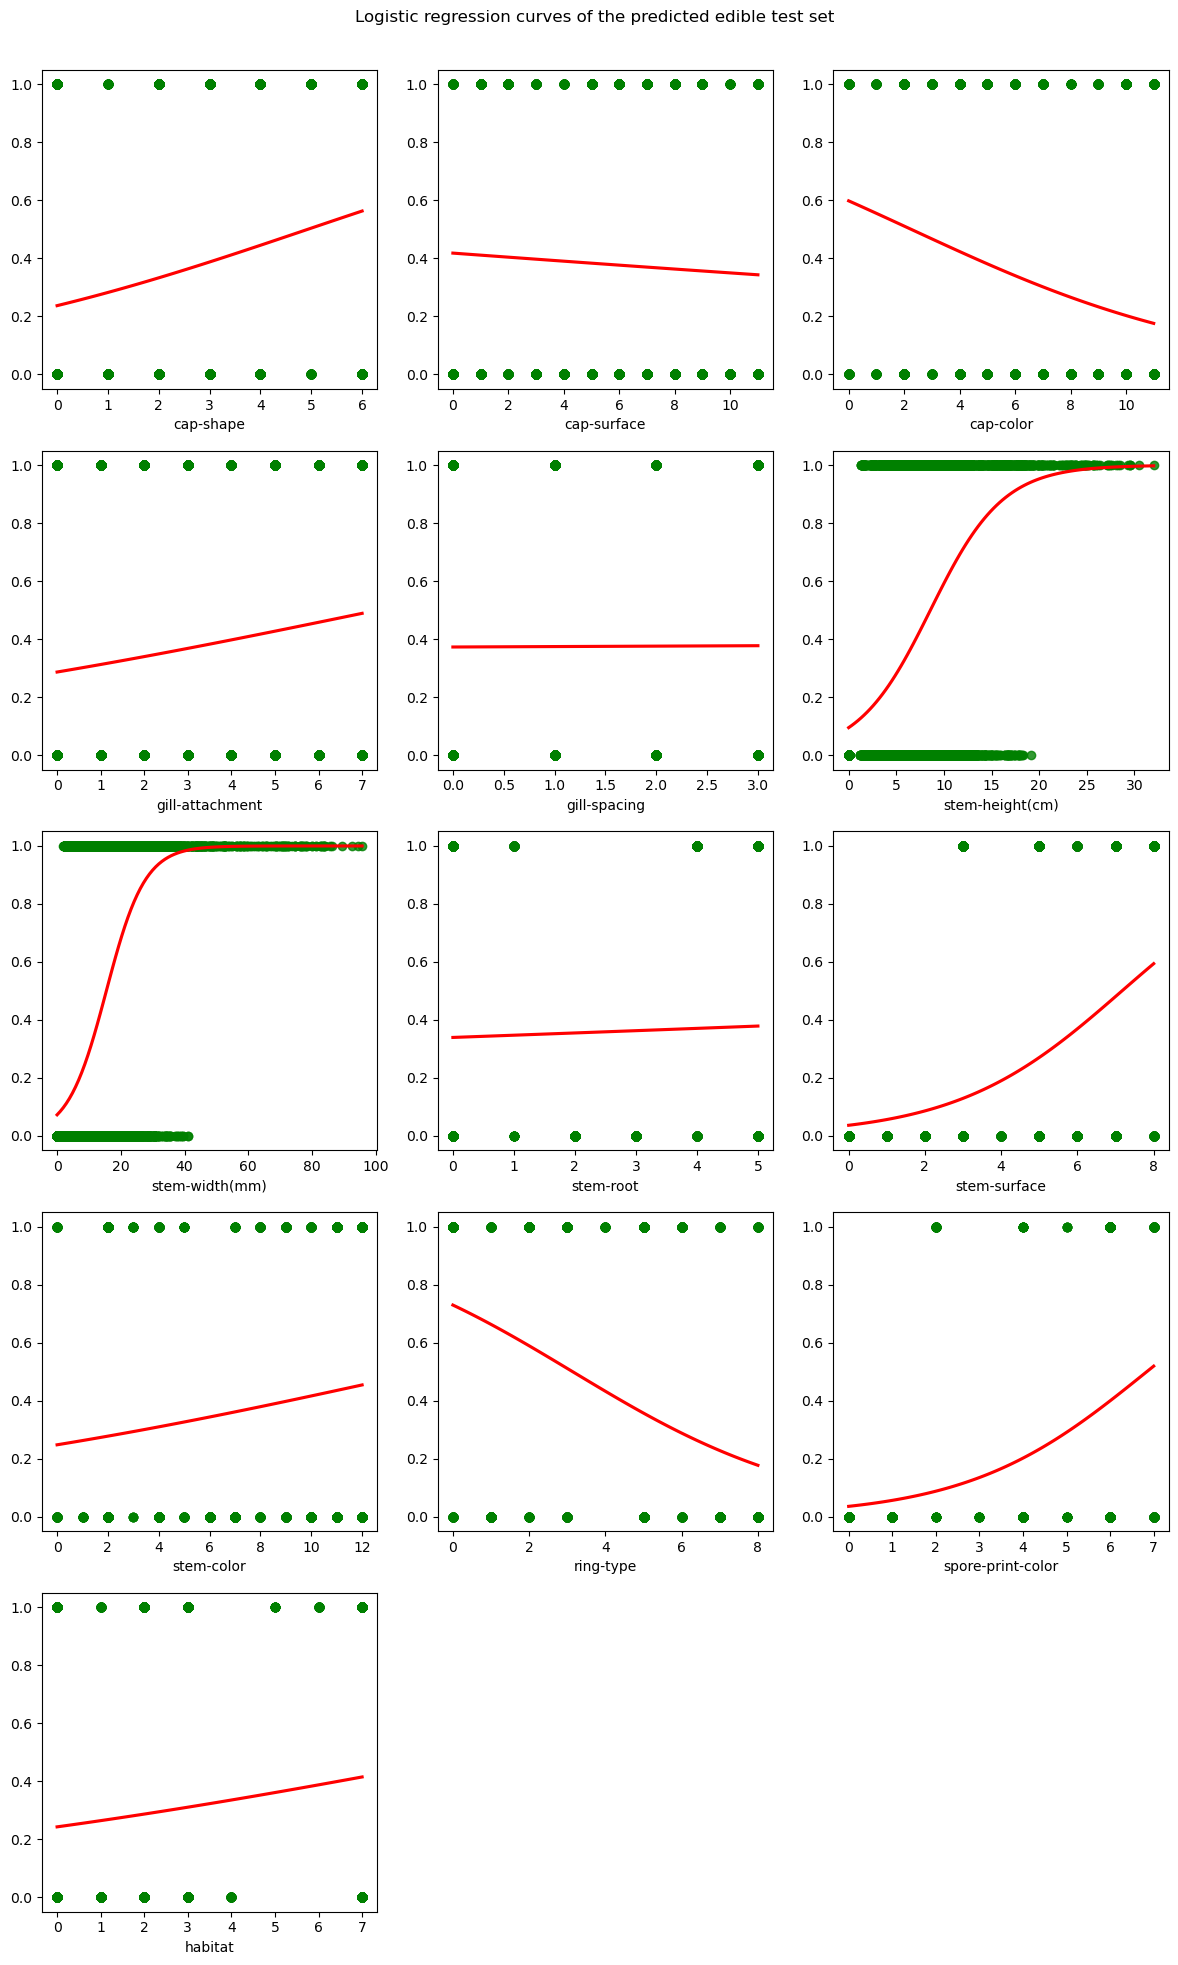

In [58]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data = predictor_test, x = col, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible test set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()

Accuracy : 0.642705092516784
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      6804
           1       0.61      0.52      0.56      5410

    accuracy                           0.64     12214
   macro avg       0.64      0.63      0.63     12214
weighted avg       0.64      0.64      0.64     12214



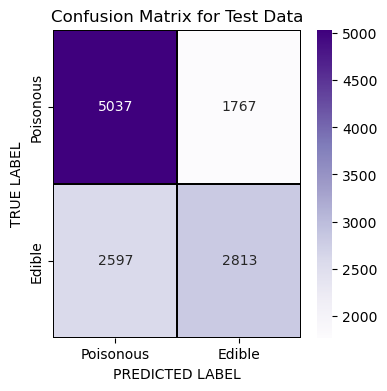

True Positive Rate :  0.5199630314232903
False Positive Rate :  0.25970017636684306


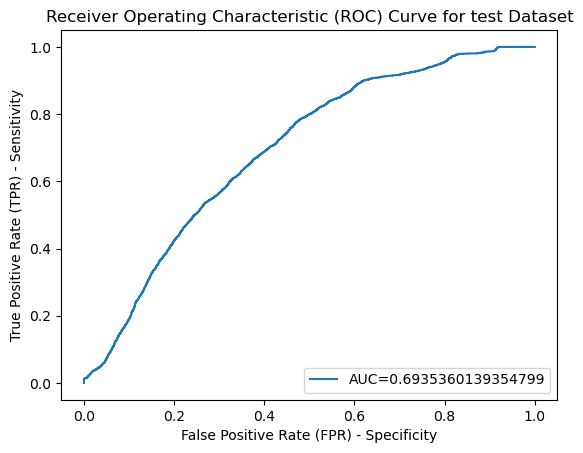

In [59]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

cm2test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

### Findings : 

Based on the evaluations done on the Train and Test Datasets using the ***Naïve Bayes Model***:

Predictions on the Train dataset had an accuracy of 0.63072 compared to previous value of 0.64116

Predictions on the Test data had an accuracy of 0.63042 compared to previous value of 0.64123

However, a insignificant increase in AUC score from 0.68420 to 0.68734

Based on the evaluations done on the Train and Test Datasets using the ***Logistic Regression Model***:

Predictions on the Train dataset had an accuracy of 0.64118 compared to previous value of 0.66622

Predictions on the Test data had an accuracy of 0.64271 compared to previous value of 0.67226

Also, a decrease in AUC score from 0.73580 to 0.69354

Unfortunately, it seems that only using the features deemed more important has led to a decrease in accuracy of 0.1%-2.9% across both models. 

Furthermore, AUC scores for both models have also generally decreased.

We proceeded to consider why these 2 models were not working optimally despite trying to optimise them. We then theorised that it may be because our nominal categorical variables have non-linear relationships, which would also explain the low correlation values in our Data Exploratory Analysis and also the better performance of the Decision Tree. Maybe these 2 models were not able to appropriately capture these non-linear relationships of our nominal categorical variables. 

We decided to look for a model that is able to capture complex non-linear relationships, and after much searching, we found and implemented this new model: ***Support Vector Machines (SVMs)*** using the **Radial Basis Function (RBF) kernel** to test our theory. The new model should be able to capture complex non-linear relationships in data.



## Model 4: Support Vector Machines

Support Vector Machines is a supervised machine learning and is generally used for classification problems as it can handle multiple continuous and categorical variables.

SVMs work by finding the optimal hyperplane (decision boundary) that separates the data points of different classes with the maximum margin. SVMs use kernels to transform the original data to a higher-dimensional space, where a hyperplane can better separate the data points of different classes. The two most commonly used SVM kernels are the linear kernel and the Radial Basis Function (RBF) kernel.

Focusing on the **Radial Basis Function (RBF) kernel**, it is used when the data is not linearly separable and needs to be transformed to a higher-dimensional space. The RBF kernel computes the similarity between two data points based on their Euclidean distance in this higher-dimensional space. The RBF kernel can capture **complex non-linear relationships** in the data, but is more computationally expensive than the linear kernel.

In [60]:
# Extract the variables and the associated data as a dataframe
predictor = mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


In [61]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Scaling the features in the train set
sc = StandardScaler()
predictor_train_std = sc.fit_transform(predictor_train)

# Import SVM model
from sklearn.svm import SVC

# Create the Support Vector Machines Object
# By default, Radial Basis Function (RBF) kernel is used
model = SVC(kernel = 'rbf')

# Fit and train the model using the training sets
# Flatten the edible_train to a 1D array
model.fit(predictor_train_std, edible_train.values.ravel())

# Predict the class using the standardized predictor variables in the train set
edible_train_pred = model.predict(predictor_train_std)

### Train Set

Accuracy : 0.9857946985978917
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27270
           1       0.98      0.99      0.98     21585

    accuracy                           0.99     48855
   macro avg       0.99      0.99      0.99     48855
weighted avg       0.99      0.99      0.99     48855



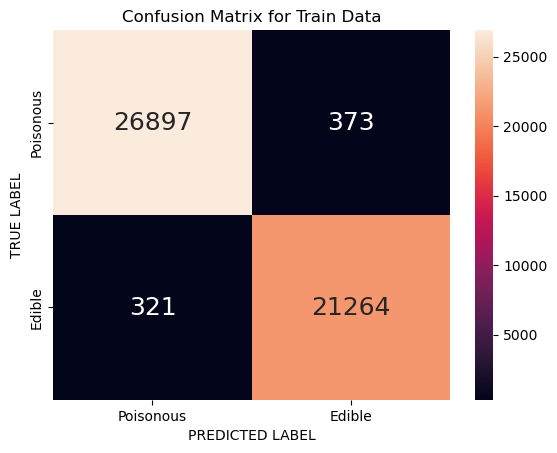

True Positive Rate :  0.9851285615010424
False Positive Rate :  0.013678034470113678
Accuracy:	 0.9857946985978917


In [62]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

sb.heatmap(confusion_matrix(edible_train, edible_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


### Test Set

Accuracy : 0.9852628131652202
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6618
           1       0.98      0.98      0.98      5596

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



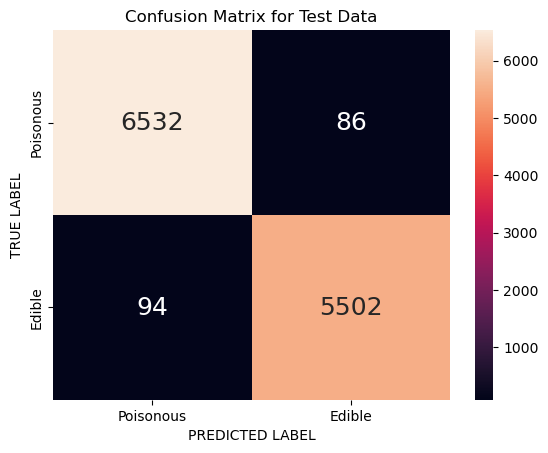

True Positive Rate :  0.9832022873481058
False Positive Rate :  0.012994862496222424


In [63]:
# Scaling the features in the test set
predictor_test_std = sc.fit_transform(predictor_test)

# Predict the class using the standardized predictor variables in the test set 
edible_test_pred = model.predict(predictor_test_std)

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

# Print the confusion matrix of the test data set
sb.heatmap(confusion_matrix(edible_test, edible_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)



### Findings :

Based on the evaluations done on the Train and Test Datasets:

Predictions on the Train dataset had an accuracy of 0.98579 while 

Predictions on the Test data had an accuracy of 0.98526

We have also obtained a very high TPR with a very low FPR.

The Support Vector Machine with the Radial Basis Function (RBF) kernel has worked very well, and our theory that our previous models could not capture the complex non-linear relationships well is likely to be correct.

But now, we still want to try improve this SVM model further through SVM Hyperparameter Tuning using the GridSearchCV technique that we learned.


## SVM Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning is the process of selecting the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are the values that are not learned during the training of the model, but are set by the user prior to training.
These parameters exhibit their importance by improving the performance of the model such as its complexity or its learning rate.

Grid search is used in hyperparameter tuning in which a grid of possible hyperparameter values is specified, and the performance of the model is evaluated for each combination of hyperparameters on a validation set. The combination of hyperparameters that gives the best performance on the validation set is selected as the optimal set of hyperparameters for the model.

The 2 Hyperparameters we are tuning now are **C & Gamma**.
To recap, SVM is about finding the best Hyperplane(more than 3-D) in separating the classes, and it deals with the balance between C & Gamma.

- **C** is a hyperparameter to control error.
Low C means a stricter decision boundary that gives Low error.
Large C means a less strict decision boundary that allows for Larger error.

- **Gamma** is a hyperparameter that controls how much curvature we want in a decision boundary.
High Gamma means more curvature.
Low Gamma means less curvature.




Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time= 1.3min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.984 total time= 1.3min
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=  47.6s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=  47.9s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.785 total time= 1.6min
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.785 total time= 1.6min
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.647 total time= 1.8min
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.635 total time= 1.8min
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.558 total time= 1.9min
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.558 total time= 1.9min
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time= 1.3min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

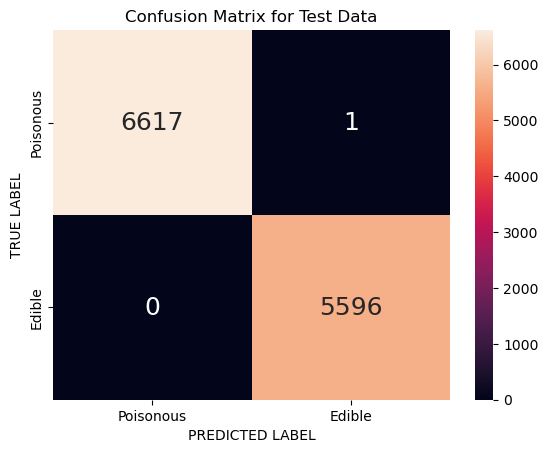

True Positive Rate :  1.0
False Positive Rate :  0.0001511030522816561


In [64]:
# Import the GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Create the GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)

# Fit the model using scaled train data (_std) for grid search
# Flatten the edible_train to a 1D array
grid.fit(predictor_train_std, edible_train.values.ravel())

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# Predict the class on the test set
grid_predictions = grid.predict(predictor_test_std)

# Print the accuracy score which is the percentage of the correct grid_predictions compared to the test set 
print("Accuracy :", accuracy_score(edible_test, grid_predictions))

# print classification report
print(classification_report(edible_test, grid_predictions))

# Print the confusion matrix of the test data set compared to grid_predictions
sb.heatmap(confusion_matrix(edible_test, grid_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, grid_predictions)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


### Findings : 

After tuning the hyperparameters, we found the optimum of C=10, gamma=0.1 which gave an acurracy score of approximately 1.00, with TPR = 1.0 and FPR = 0.00015! We are very satisfied with the results.

# Conclusion

Through our Data Exploratory Analysis, we discovered that most features of a mushroom did not seem to have any clear correlation to the edibility of a mushroom. But when inputted into certain Machine Learning Models, the combination of these features can produce a fairly reliable prediction. 

Through Optimising our models, we have also discovered that features of a mushroom are likely to have non-linear relationships with each other. We then discovered that our Naïve Bayes Model and Logistic Regression Model did not work well when fed variables with non-linear relationships. 

Meanwhile, the Decision Tree and Support Vector Machine Model with RBF kernel worked exceptionally well when fed with non-linearly related variables. They had high accuracies in predicting edibility of a mushroom while having a very high TPR and a very low FPR. 

In conclusion, with the right models and sufficient combinations of features, it is indeed possible to predict if a mushroom is edible or not with a great amount of accuracy based off the mushroom's features.